## Superpixel and Stamp Index Examples

Nothing is actually computed in this notebook but it does show examples of the RGB Bayer array and how we index the colors and the pixel locations.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

from piaa import utils

%matplotlib inline

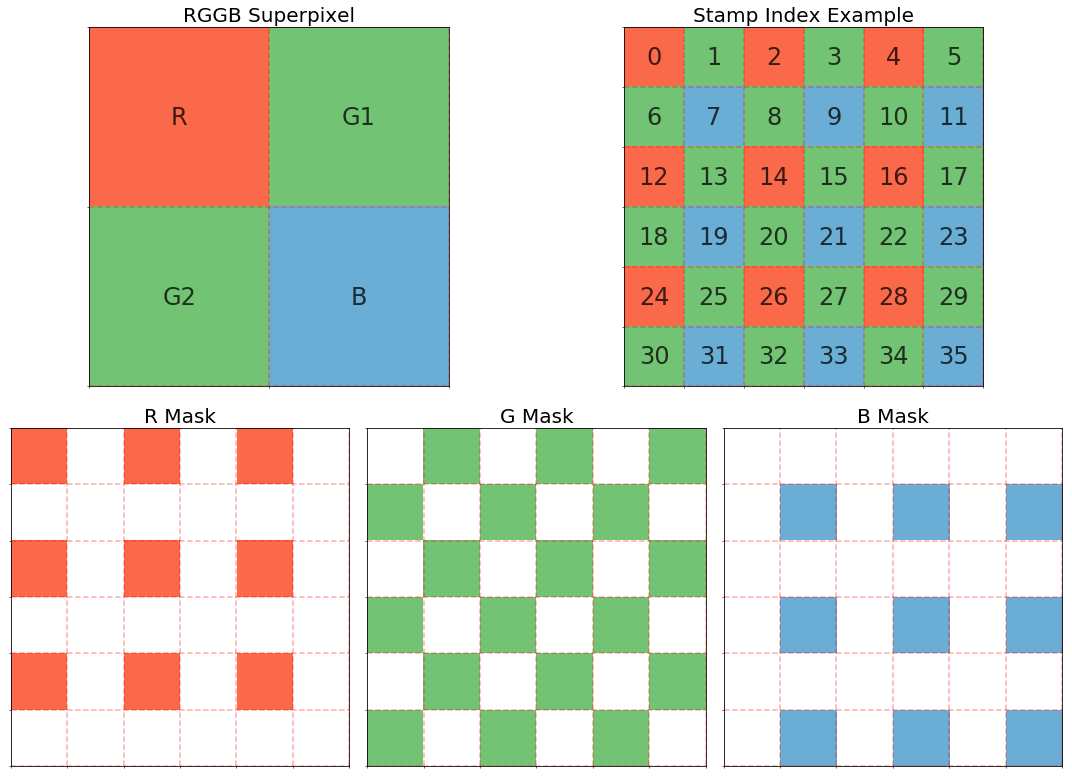

In [2]:
# Grid layout
plt.figure(figsize=(15,11))
ax1 = plt.subplot2grid((2,6), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2,6), (0, 3), colspan=3)

ax3 = plt.subplot2grid((2,6), (1, 0), colspan=2)
ax4 = plt.subplot2grid((2,6), (1, 2), colspan=2)
ax5 = plt.subplot2grid((2,6), (1, 4), colspan=2)

###########################################
# Superpixel
###########################################
superpixel = np.array([[1, 1], [1, 1]])

ax1.text(x=0.25, y=0.75, ha='center', va='center', s='R', fontsize=24, alpha=0.75, transform=ax1.transAxes)
ax1.text(x=0.75, y=0.75, ha='center', va='center', s='G1', fontsize=24, alpha=0.75, transform=ax1.transAxes)
ax1.text(x=0.25, y=0.25, ha='center', va='center', s='G2', fontsize=24, alpha=0.75, transform=ax1.transAxes)
ax1.text(x=0.75, y=0.25, ha='center', va='center', s='B', fontsize=24, alpha=0.75, transform=ax1.transAxes)
utils.add_pixel_grid(ax1, 2, 2)

r_a_mask, g_a_mask, b_a_mask = utils.make_masks(superpixel)

ax1.imshow(np.ma.array(np.ones((2, 2)), mask=~r_a_mask), cmap='Reds', vmin=0, vmax=2., )
ax1.imshow(np.ma.array(np.ones((2, 2)), mask=~g_a_mask), cmap='Greens', vmin=0, vmax=2., )
ax1.imshow(np.ma.array(np.ones((2, 2)), mask=~b_a_mask), cmap='Blues', vmin=0, vmax=2., )
ax1.set_title("RGGB Superpixel", fontsize=20)

###########################################
# Index Scheme
###########################################
stamp_height = 6
stamp_width = 6
stamp = np.arange(stamp_height * stamp_width).reshape(stamp_height, stamp_width)
for i in range(stamp_height):
    for j in range(stamp_width):
        x_loc = ((i / stamp_width) + (0.5 / stamp_width))
        y_loc = (((stamp_height - j) / stamp_height) - (0.5 / stamp_height))
        index_str = str((j * 6) + i)
        ax2.text(x=x_loc, y=y_loc, ha='center', va='center', s=index_str, 
                 fontsize=24, alpha=0.75, transform=ax2.transAxes)
        
r_a_mask, g_a_mask, b_a_mask = utils.make_masks(stamp)

utils.add_pixel_grid(ax2, stamp_width, stamp_height)

r_mask = np.ma.array(np.ones((stamp_height, stamp_width)), mask=~r_a_mask)
g_mask = np.ma.array(np.ones((stamp_height, stamp_width)), mask=~g_a_mask)
b_mask = np.ma.array(np.ones((stamp_height, stamp_width)), mask=~b_a_mask)

ax2.imshow(r_mask, cmap='Reds', vmin=0, vmax=2.)
ax2.imshow(g_mask, cmap='Greens', vmin=0, vmax=2.)
ax2.imshow(b_mask, cmap='Blues', vmin=0, vmax=2.)
ax2.set_title("Stamp Index Example", fontsize=20)

###########################################
# Stamp Masks
###########################################
ax3.imshow(r_mask, cmap='Reds', vmin=0, vmax=2.)
ax4.imshow(g_mask, cmap='Greens', vmin=0, vmax=2.)
ax5.imshow(b_mask, cmap='Blues', vmin=0, vmax=2.)

utils.add_pixel_grid(ax3, stamp_width, stamp_height)
utils.add_pixel_grid(ax4, stamp_width, stamp_height)
utils.add_pixel_grid(ax5, stamp_width, stamp_height)

ax3.set_title("R Mask", fontsize=20)
ax4.set_title("G Mask", fontsize=20)
ax5.set_title("B Mask", fontsize=20)

plt.tight_layout()

plt.savefig('bayer-demo.png', dpi=300)